In [1]:

import pandas as pd
import numpy as np

from scipy import stats

import os 

os.chdir("/home/ptruong/git/dia_sum/scripts/PXD002952")

from q_value import qvalues
from triqler_output_to_df import  parse_triqler
#os.chdir("/hdd_14T/data/PXD002952/osw_res_20210303/hye124/ttof6600/32fix/full_ts_v")

os.chdir("/hdd_14T/data/PXD002952/20210614_dataset/diaumpire_spectral_lib_20210706/MSFragger_20210707/diann_20210811")


In [2]:
import seaborn as sns

sns.set_context("poster")

In [3]:

# filename has different formatting, we need to change number or implement regex.
experiment_id_mapper = lambda x: x.split("_")[5]
sample_id_mapper = lambda x: x.split("_")[8] #hye124 
specie_mapper = lambda x: x.split("_")[-1]

def read_in_and_filter(filename, m_score_treshold = 0.01):  
    print(filename)
    df = pd.read_csv(filename, sep = "\t")
    df = df[df.decoy != 1]
    df = df[df.m_score < m_score_treshold] # filter away crap, so all values should be good... we take average of top3 here
    print(str(len(df)) + " significantly identified peptides at " + str(m_score_treshold) + " FDR-treshold.")
    print("")
    df["experiment_id"] = df["filename"].map(experiment_id_mapper)
    df["sample_id"] = df["filename"].map(sample_id_mapper)
    sample_id = df.sample_id.unique()[0]
    experiment_id = df.experiment_id.unique()[0]     

    #midx = pd.MultiIndex(levels = [[sample_id],[experiment_id]], codes = [[0],[0]], names = ["sample_id", "experiment_id"])
    df["specie"] = df["ProteinName"].map(specie_mapper)
    df = df.set_index(["specie", "ProteinName", "FullPeptideName", "sample_id", "experiment_id"])
    df = df[["Intensity"]]
    df = pd.DataFrame(df.values, index = df.index)
    
    return df


In [4]:
os.listdir()

['report.tsv',
 'msstats_run.csv',
 'report.log.txt',
 'sessionInfo.txt',
 'triqler_results',
 'msrobsum_results_msqrobsum.rds',
 'msqrobsum_protein_sum_20210817.csv',
 'report.stats.tsv',
 'msqrobsum_result.csv',
 'report.pg_matrix.tsv',
 'run_triqler.sh',
 'pd.csv',
 'report.pdf',
 'diann_msstats_input.csv',
 'fd.csv',
 'report.gg_matrix.tsv',
 'msstat_output_runleveldata.csv',
 'msstats-2.log',
 'report.unique_genes_matrix.tsv',
 'triqler_input_diann_searchScore_Qvalue.csv',
 'triqler_input_diann_searchScore_Qvalue.csv.pqr.tsv',
 'expr.csv',
 'msstats-1.log',
 'msstat_output_filtered.csv',
 'msstats.log',
 'report.pr_matrix.tsv']

In [5]:
df = pd.read_csv("triqler_input_diann_searchScore_Qvalue.csv", sep = "\t")                      


In [6]:
df

,run,condition,charge,searchScore,intensity,peptide,proteins
0,002-Pedro,1,2,9.825093,791.822144,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
1,003-Pedro,2,2,9.464517,773.533447,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
2,004-Pedro,1,2,9.198167,910.519959,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
3,005-Pedro,2,2,9.486911,860.940491,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
4,006-Pedro,1,2,9.324160,909.658081,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
...,...,...,...,...,...,...,...
217888,005-Pedro,2,2,9.391661,289.798309,YYYIPQYK,Q8N183_HUMAN
217889,006-Pedro,1,2,9.324160,362.397034,YYYIPQYK,Q8N183_HUMAN
217890,007-Pedro,2,2,9.220538,338.117950,YYYIPQYK,Q8N183_HUMAN
217891,004-Pedro,1,4,2.363257,50.300472,YYYKFIKCDADLLESR,DECOY_Q70Z53_HUMAN


In [7]:
x = 0.05
e = -np.log(x)
1/np.e**e

0.05000000000000002

In [8]:
df["q_value"] = 1/np.e**df["searchScore"]

In [9]:
df.q_value.max()

0.8778716326000001

In [10]:
#treshold = 1.00
treshold = 0.01
df = df[df["q_value"] < treshold]

In [11]:
df["intensity"] = np.log2(df["intensity"])

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_means = df.groupby("peptide").mean()

In [13]:
df_stat = pd.DataFrame(df_means.intensity, index = df_means.index, columns = ["mu"])


In [14]:
pd.DataFrame(df_means.intensity)

,intensity
peptide,
AAAAAAAAAAGAAGGR,9.746496
AAAAAAAAAPAAAATAPTTAATTAATAAQ,8.327787
AAAAAAAGDSDSWDADAFSVEDPVRK,7.700654
AAAAAAGAASGLPGPVAQGLK,9.313086
AAAAAATAAAAASIR,6.960836
...,...
YYTEFPTVLDITAEDPSK,7.409097
YYTGNYDQYVK,6.658058
YYTGVVNNNEMVALQR,5.365163


In [15]:
df_stat

,mu
peptide,
AAAAAAAAAAGAAGGR,NaN
AAAAAAAAAPAAAATAPTTAATTAATAAQ,NaN
AAAAAAAGDSDSWDADAFSVEDPVRK,NaN
AAAAAAGAASGLPGPVAQGLK,NaN
AAAAAATAAAAASIR,NaN
...,...
YYTEFPTVLDITAEDPSK,NaN
YYTGNYDQYVK,NaN
YYTGVVNNNEMVALQR,NaN


In [16]:
df

,run,condition,charge,searchScore,intensity,peptide,proteins,q_value
0,002-Pedro,1,2,9.825093,9.629033,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000054
1,003-Pedro,2,2,9.464517,9.595320,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000078
2,004-Pedro,1,2,9.198167,9.830547,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000101
3,005-Pedro,2,2,9.486911,9.749770,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000076
4,006-Pedro,1,2,9.324160,9.829181,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000089
...,...,...,...,...,...,...,...,...
217886,003-Pedro,2,2,9.256460,8.325938,YYYIPQYK,Q8N183_HUMAN,0.000095
217887,004-Pedro,1,2,9.198167,8.232992,YYYIPQYK,Q8N183_HUMAN,0.000101
217888,005-Pedro,2,2,9.391661,8.178905,YYYIPQYK,Q8N183_HUMAN,0.000083
217889,006-Pedro,1,2,9.324160,8.501427,YYYIPQYK,Q8N183_HUMAN,0.000089


In [17]:

import matplotlib.pyplot as plt
import seaborn as sns 

def get_peptide_mu_sigma(df):
    df_means = df.groupby("peptide").mean()

    df_stat = pd.DataFrame(df_means.intensity.values, index = df_means.index, columns = ["mu"])
    df_stat["std"] = df.groupby("peptide").std().intensity
    df_stat["std/mu-ratio"] = df_stat["std"] / df_stat["mu"]
    return df_stat

def select_specie_and_sample(df, specie = "HUMAN", sample = "1"):
    return df.iloc[(df.index.get_level_values("specie") == specie) & (df.index.get_level_values("sample_id") == sample), :]

def select_sample(df, sample = "1"):
    return df.iloc[(df.index.get_level_values("sample_id") == sample), :]

In [18]:
df_stat

,mu
peptide,
AAAAAAAAAAGAAGGR,NaN
AAAAAAAAAPAAAATAPTTAATTAATAAQ,NaN
AAAAAAAGDSDSWDADAFSVEDPVRK,NaN
AAAAAAGAASGLPGPVAQGLK,NaN
AAAAAATAAAAASIR,NaN
...,...
YYTEFPTVLDITAEDPSK,NaN
YYTGNYDQYVK,NaN
YYTGVVNNNEMVALQR,NaN


In [19]:
#mu_sig_sample1 = get_peptide_mu_sigma(select_sample(df, sample = "1"))
#mu_sig_sample2 = get_peptide_mu_sigma(select_sample(df, sample = "2"))

#bins = [i*2 for i in range(11)]
#mu_sig_sample1["binned_mu"] = pd.cut(mu_sig_sample1["mu"], bins)
#mu_sig_sample1["quantile_bin_mu"] = pd.qcut(mu_sig_sample1["mu"], q=8)

#mu_sig_sample2["binned_mu"] = pd.cut(mu_sig_sample2["mu"], bins)
#mu_sig_sample2["quantile_bin_mu"] = pd.qcut(mu_sig_sample2["mu"], q=8)

In [20]:
#f, ax = plt.subplots(2, 2, figsize = (17,17))
#sns.violinplot(x='binned_mu', y='std', data=mu_sig_sample1, ax=ax[0,0])
#ax[0,0].set_title("sample1 - std/mu ratio vs binned_mu for log-transformed peptide values")

#sns.violinplot(x='binned_mu', y='std', data=mu_sig_sample2, ax=ax[0,1])
#ax[0,1].set_title("sample2 - std/mu ratio vs binned_mu for log-transformed peptide values")

#sns.violinplot(x='quantile_bin_mu', y='std', data=mu_sig_sample1, ax=ax[1,0])
#ax[1,0].set_title("sample1 - std/mu vs quantile_bin_mu for log-transformed peptide values")

#sns.violinplot(x='quantile_bin_mu', y='std', data=mu_sig_sample2, ax=ax[1,1])
#ax[1,1].set_title("sample2 - std/mu vs quantile_bin_mu for log-transformed peptide values")


In [21]:
#df["intensity"] = df[0]
#df = df.drop([0], axis = 1)
df_stats = get_peptide_mu_sigma(df).dropna()

In [22]:
df_stats["mu"] 

bins = [i*2 for i in range(11)]
df_stats["binned_mu"] = pd.cut(df_stats["mu"], bins,  include_lowest=True)
df_stats["quantile_bin_mu"] = pd.qcut(df_stats["mu"], q=8)




In [23]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
peptide,,,,,
AAAAAAAAAAGAAGGR,9.746496,0.101192,0.010382,"(8.0, 10.0]","(8.884, 14.279]"
AAAAAAAAAPAAAATAPTTAATTAATAAQ,8.327787,0.908112,0.109046,"(8.0, 10.0]","(8.117, 8.884]"
AAAAAAAGDSDSWDADAFSVEDPVRK,7.700654,0.092484,0.012010,"(6.0, 8.0]","(7.54, 8.117]"
AAAAAAGAASGLPGPVAQGLK,9.313086,0.091770,0.009854,"(8.0, 10.0]","(8.884, 14.279]"
AAAAAATAAAAASIR,6.960836,0.215554,0.030967,"(6.0, 8.0]","(6.584, 7.072]"
...,...,...,...,...,...
YYTEFPTVLDITAEDPSK,7.409097,0.320670,0.043281,"(6.0, 8.0]","(7.072, 7.54]"
YYTGNYDQYVK,6.658058,0.124905,0.018760,"(6.0, 8.0]","(6.584, 7.072]"
YYTGVVNNNEMVALQR,5.365163,0.463376,0.086368,"(4.0, 6.0]","(5.257, 6.032]"


In [24]:
df_stats


,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
peptide,,,,,
AAAAAAAAAAGAAGGR,9.746496,0.101192,0.010382,"(8.0, 10.0]","(8.884, 14.279]"
AAAAAAAAAPAAAATAPTTAATTAATAAQ,8.327787,0.908112,0.109046,"(8.0, 10.0]","(8.117, 8.884]"
AAAAAAAGDSDSWDADAFSVEDPVRK,7.700654,0.092484,0.012010,"(6.0, 8.0]","(7.54, 8.117]"
AAAAAAGAASGLPGPVAQGLK,9.313086,0.091770,0.009854,"(8.0, 10.0]","(8.884, 14.279]"
AAAAAATAAAAASIR,6.960836,0.215554,0.030967,"(6.0, 8.0]","(6.584, 7.072]"
...,...,...,...,...,...
YYTEFPTVLDITAEDPSK,7.409097,0.320670,0.043281,"(6.0, 8.0]","(7.072, 7.54]"
YYTGNYDQYVK,6.658058,0.124905,0.018760,"(6.0, 8.0]","(6.584, 7.072]"
YYTGVVNNNEMVALQR,5.365163,0.463376,0.086368,"(4.0, 6.0]","(5.257, 6.032]"


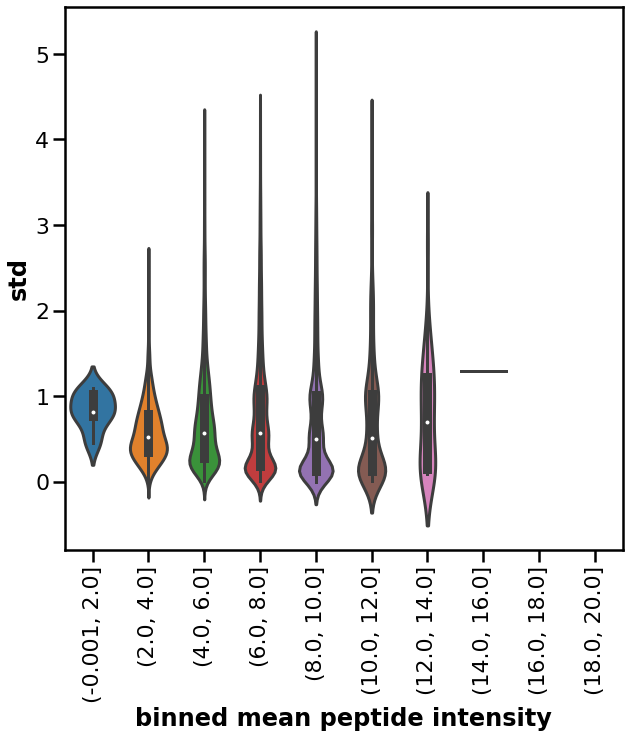

In [25]:
f, ax = plt.subplots(1, 1, figsize = (10,10))
sns.violinplot(x='binned_mu', y='std', data=df_stats, ax=ax)
#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel("std", fontweight = "bold")
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontweight="bold")
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major',labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

In [26]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
peptide,,,,,
AAAAAAAAAAGAAGGR,9.746496,0.101192,0.010382,"(8.0, 10.0]","(8.884, 14.279]"
AAAAAAAAAPAAAATAPTTAATTAATAAQ,8.327787,0.908112,0.109046,"(8.0, 10.0]","(8.117, 8.884]"
AAAAAAAGDSDSWDADAFSVEDPVRK,7.700654,0.092484,0.012010,"(6.0, 8.0]","(7.54, 8.117]"
AAAAAAGAASGLPGPVAQGLK,9.313086,0.091770,0.009854,"(8.0, 10.0]","(8.884, 14.279]"
AAAAAATAAAAASIR,6.960836,0.215554,0.030967,"(6.0, 8.0]","(6.584, 7.072]"
...,...,...,...,...,...
YYTEFPTVLDITAEDPSK,7.409097,0.320670,0.043281,"(6.0, 8.0]","(7.072, 7.54]"
YYTGNYDQYVK,6.658058,0.124905,0.018760,"(6.0, 8.0]","(6.584, 7.072]"
YYTGVVNNNEMVALQR,5.365163,0.463376,0.086368,"(4.0, 6.0]","(5.257, 6.032]"


# Adjust to remove peptides with missing values in samples

In [27]:
peptides_included_in_all_samples = (df.groupby("peptide").count() >= 6).index

In [28]:
df_filtered = df[df["peptide"].isin(peptides_included_in_all_samples)]

In [29]:
df_stats_filtered = get_peptide_mu_sigma(df_filtered)

In [30]:
bins = [i*2 for i in range(11)]
df_stats_filtered["binned_mu"] = pd.cut(df_stats_filtered["mu"], bins,  include_lowest=True)
#df_stats_filtered["quantile_bin_mu"] = pd.qcut(df_stats_filtered["mu"], q=8)


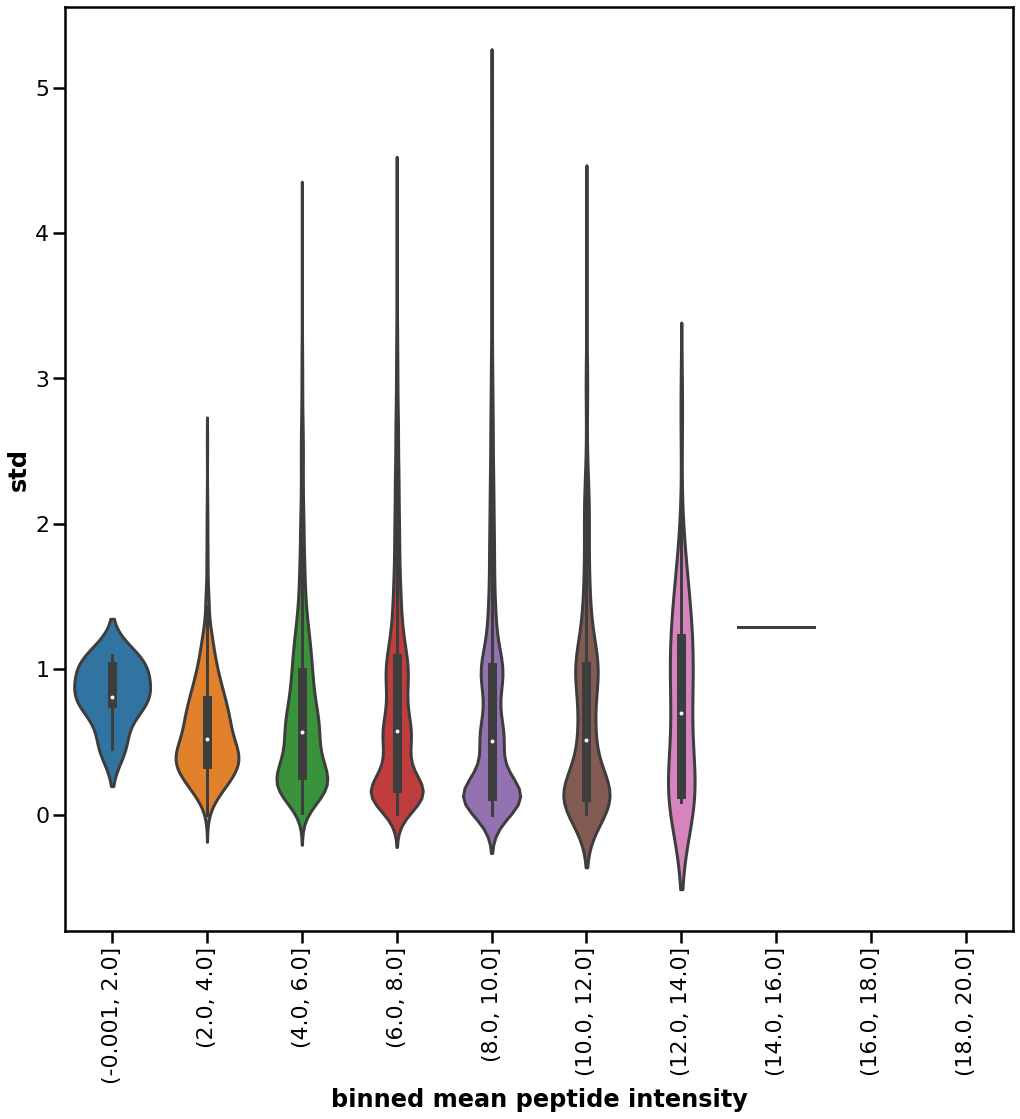

In [31]:
f, ax = plt.subplots(1, 1, figsize = (17,17))
sns.violinplot(x='binned_mu', y='std', data=df_stats_filtered, ax=ax)
#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel("std", fontweight = "bold")
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontweight="bold")
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major',labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

# Quantile filtered

In [32]:
q = 10

df_stats["quantile_bin_mu"] = pd.qcut(df_stats["mu"], q=10, precision = 0)


In [33]:
bin_median_function = lambda x: round((x.left + x.right)/2, 2)

In [34]:
df_stats["quantile_bin_mu_median_of_bin_range"] = df_stats["quantile_bin_mu"].apply(bin_median_function)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


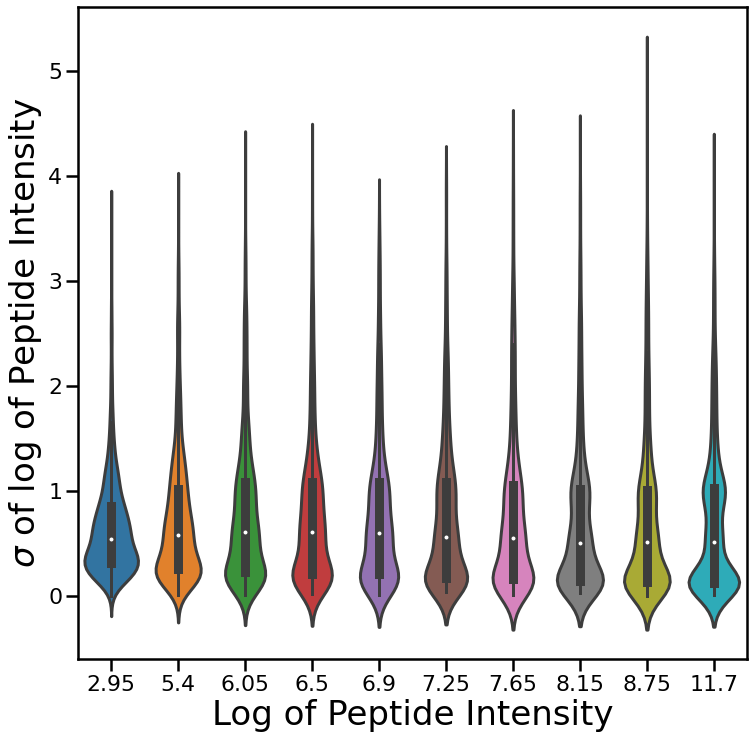

In [67]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
sns.violinplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats, ax=ax)
#ax.set_title("Mean vs Standard Deviation of Logarithm of Peptide Intensity, quantile binned", fontsize = 26, fontweight = "bold")
#ax.set_title("Mean vs Standard Deviation of Peptide Intensity, quantile binned", fontsize = 26, fontweight = "bold")

#ax.set_ylabel("Standard Deviation of Logarithm of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel("Logarithm of Peptide", fontsize=26, fontweight="bold")

#ax.set_ylabel("Standard Deviation of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel(" Peptide intensity", fontsize=26, fontweight="bold")


#ax.tick_params(axis='x', which='major', labelsize=22, labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=22)

#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major')#,labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


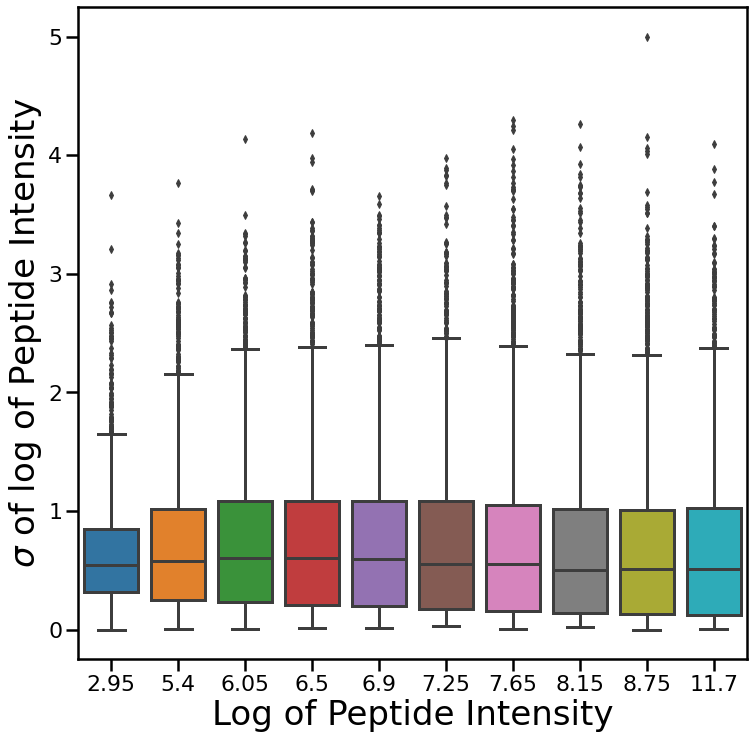

In [68]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
#sns.violinplot(x='quantile_bin_mu', y='std', data=df_stats, ax=ax)
sns.boxplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats, ax=ax)

ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
ax.tick_params(axis='x', which='major')#,labelrotation=90)



In [37]:
df_stats_filtered = df_stats_filtered.dropna()

In [38]:
#df_stats_filtered

In [39]:
df_stats_filtered

,mu,std,std/mu-ratio,binned_mu
peptide,,,,
AAAAAAAAAAGAAGGR,9.746496,0.101192,0.010382,"(8.0, 10.0]"
AAAAAAAAAPAAAATAPTTAATTAATAAQ,8.327787,0.908112,0.109046,"(8.0, 10.0]"
AAAAAAAGDSDSWDADAFSVEDPVRK,7.700654,0.092484,0.012010,"(6.0, 8.0]"
AAAAAAGAASGLPGPVAQGLK,9.313086,0.091770,0.009854,"(8.0, 10.0]"
AAAAAATAAAAASIR,6.960836,0.215554,0.030967,"(6.0, 8.0]"
...,...,...,...,...
YYTEFPTVLDITAEDPSK,7.409097,0.320670,0.043281,"(6.0, 8.0]"
YYTGNYDQYVK,6.658058,0.124905,0.018760,"(6.0, 8.0]"
YYTGVVNNNEMVALQR,5.365163,0.463376,0.086368,"(4.0, 6.0]"


In [40]:
df_stats_filtered["quantile_bin_mu"] = pd.qcut(df_stats_filtered["mu"], q=q, precision=0)

In [41]:
df_stats_filtered["quantile_bin_mu_median_of_bin_range"] = df_stats_filtered["quantile_bin_mu"].apply(bin_median_function)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


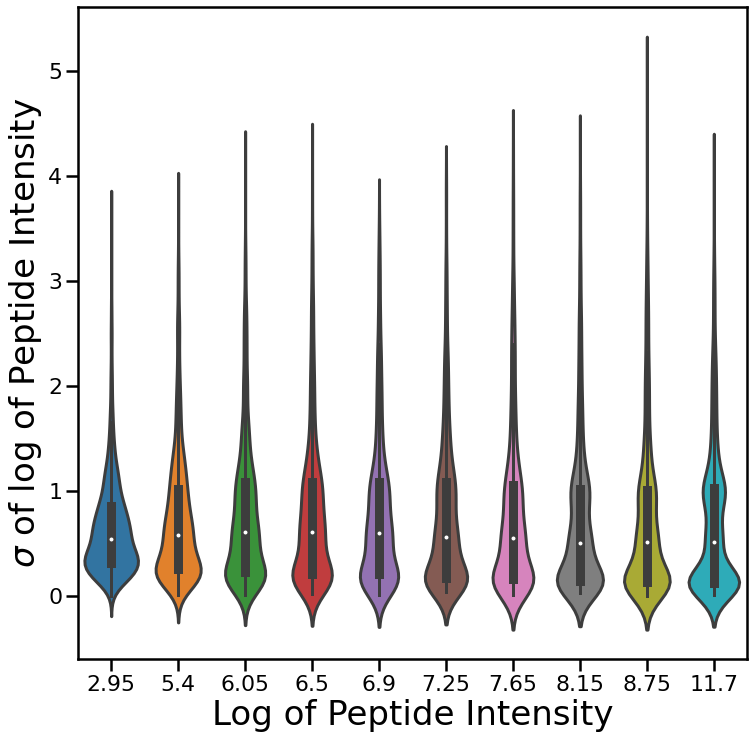

In [69]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
sns.violinplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats_filtered, ax=ax)
#ax.set_title("Mean vs Standard Deviation of Logarithm of Peptide Intensity", fontsize = 26, fontweight = "bold")
#ax.set_title("Mean vs Standard Deviation of Peptide Intensity, quantile binned", fontsize = 26, fontweight = "bold")

#ax.set_ylabel("Standard Deviation of Logarithm of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel(" Logarithm of Peptide intensity", fontsize=26, fontweight="bold")

#ax.set_ylabel("Standard Deviation of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel(" Peptide intensity", fontsize=26, fontweight="bold")


#ax.tick_params(axis='x', which='major', labelsize=22, labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=22)
#ax.tick_params(axis='both', which='minor', labelsize=8)


#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major')#,labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


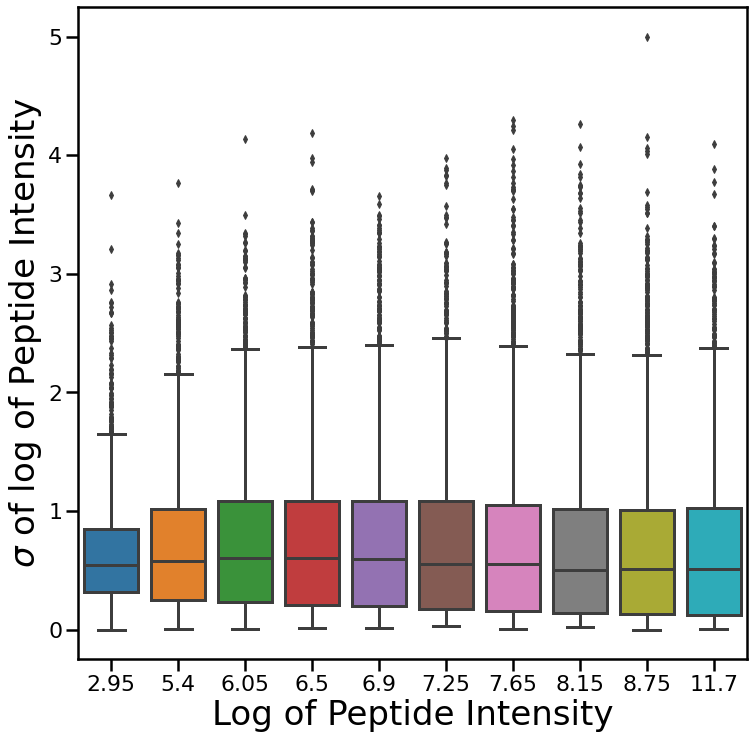

In [70]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
#sns.violinplot(x='quantile_bin_mu', y='std', data=df_stats, ax=ax)
sns.boxplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats_filtered, ax=ax)

ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity", fontsize = 34)
ax.set_xlabel("Log of Peptide Intensity", fontsize = 34)
ax.tick_params(axis='x', which='major')#,labelrotation=90)




# KDE histograms of the bin-distributions

In [44]:
bin_vals = df_stats["quantile_bin_mu_median_of_bin_range"].values.unique()

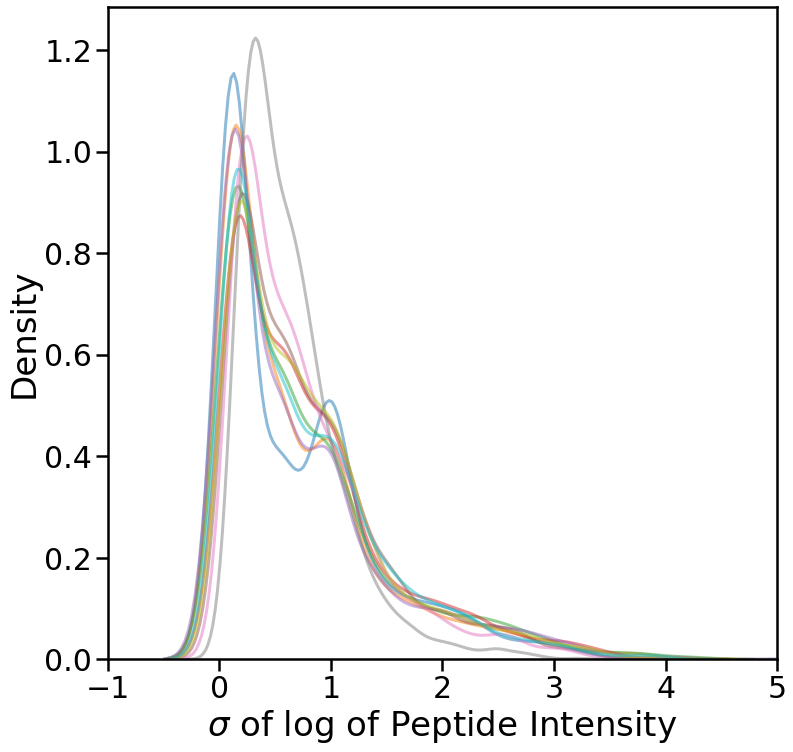

In [62]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

for i in bin_vals:
    df_stats_slice = df_stats[df_stats["quantile_bin_mu_median_of_bin_range"] == i].copy()
    sns.kdeplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)
ax.set_xlim(-1,5)

ax.set_xlabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel("Density", fontsize = 34)


for line in ax.get_lines():
    line.set_alpha(0.5)

In [46]:
bin_vals = df_stats_filtered["quantile_bin_mu_median_of_bin_range"].values.unique()

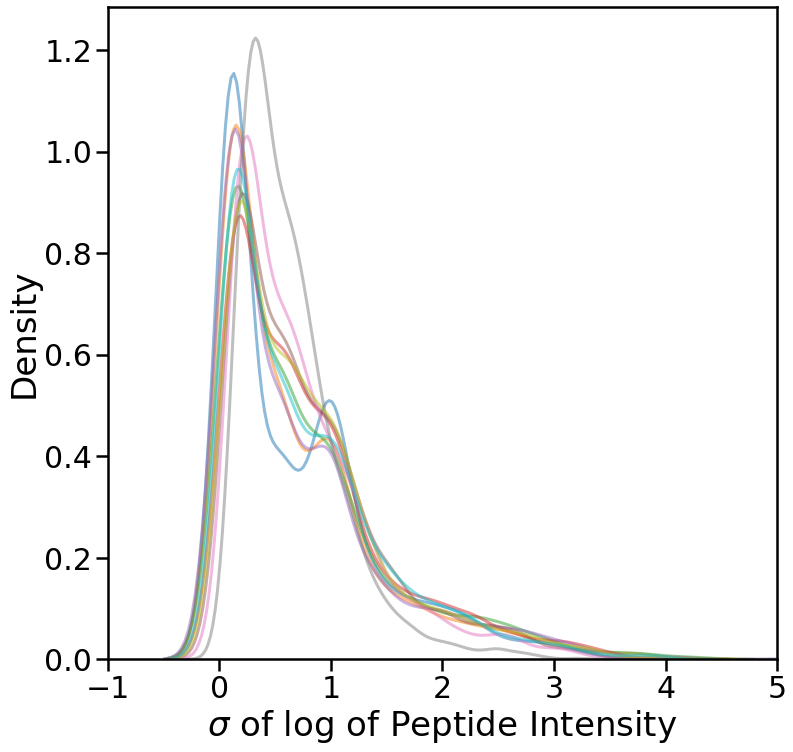

In [63]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

for i in bin_vals:
    df_stats_slice = df_stats_filtered[df_stats_filtered["quantile_bin_mu_median_of_bin_range"] == i].copy()
    sns.kdeplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)
ax.set_xlim(-1,5)

ax.set_xlabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel("Density", fontsize = 34)


for line in ax.get_lines():
    line.set_alpha(0.5)

2.95


<AxesSubplot:xlabel='std', ylabel='Density'>

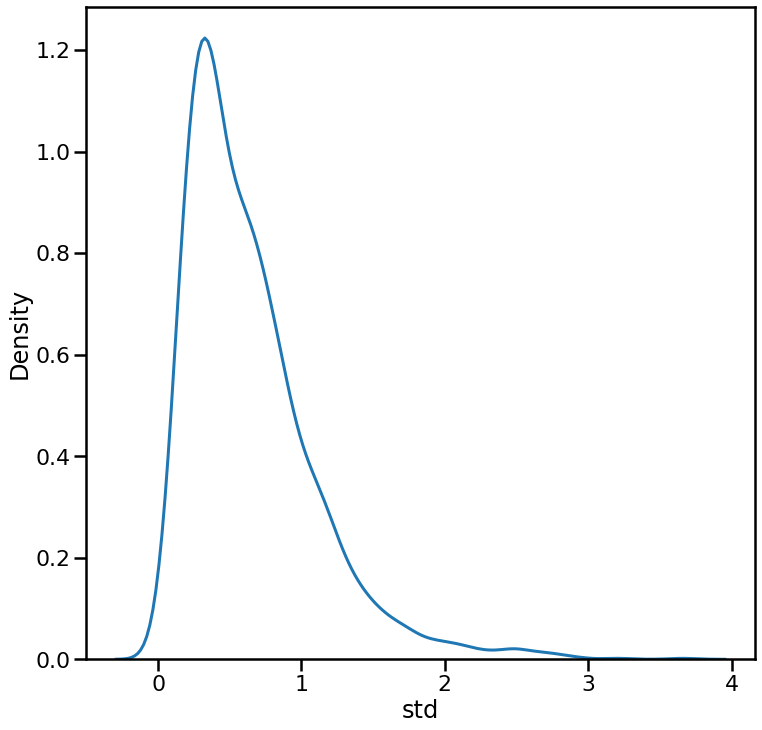

In [48]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
i = 7
print(bin_vals[i])
df_stats_slice = df_stats_filtered[df_stats_filtered["quantile_bin_mu_median_of_bin_range"] == bin_vals[i]].copy()
sns.kdeplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)


In [49]:
df_stats.quantile_bin_mu.values.unique()

[(9.1, 14.3], (7.9, 8.4], (7.4, 7.9], (6.7, 7.1], (8.4, 9.1], (5.8, 6.3], (5.0, 5.8], (0.9, 5.0], (6.3, 6.7], (7.1, 7.4]]
Categories (10, interval[float64]): [(0.9, 5.0] < (5.0, 5.8] < (5.8, 6.3] < (6.3, 6.7] ... (7.4, 7.9] < (7.9, 8.4] < (8.4, 9.1] < (9.1, 14.3]]

# Violin overlap

In [50]:
from matplotlib.pyplot import cm
n = len(bin_vals)
color = cm.rainbow(np.linspace(0, 1, n))

Text(0, 0.5, '$\\sigma$ of log of Peptide Intensity ')

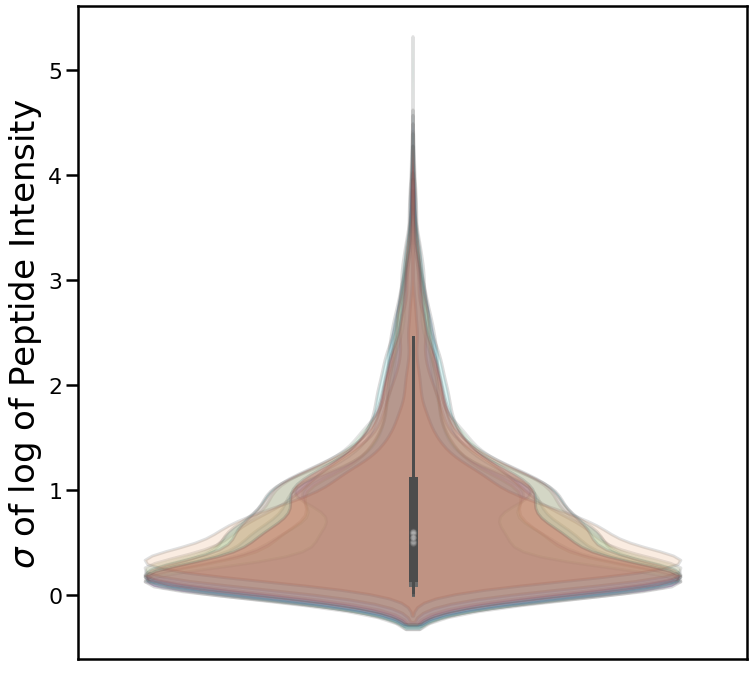

In [64]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

bin_vals = df_stats["quantile_bin_mu_median_of_bin_range"].values.unique()

for i in range(len(bin_vals)):
    df_stats_slice = df_stats[df_stats["quantile_bin_mu_median_of_bin_range"] == bin_vals[i]].copy()
    df_stats_slice["quantile_bin_mu_median_of_bin_range"] = 0
    sns.violinplot(data = df_stats_slice, x  = "quantile_bin_mu_median_of_bin_range", y = "std",
                   ax = ax, color = color[i])
    plt.setp(ax.collections, alpha = 0.2)
ax.get_xaxis().set_visible(False)
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)

Text(0, 0.5, '$\\sigma$ of log of Peptide Intensity ')

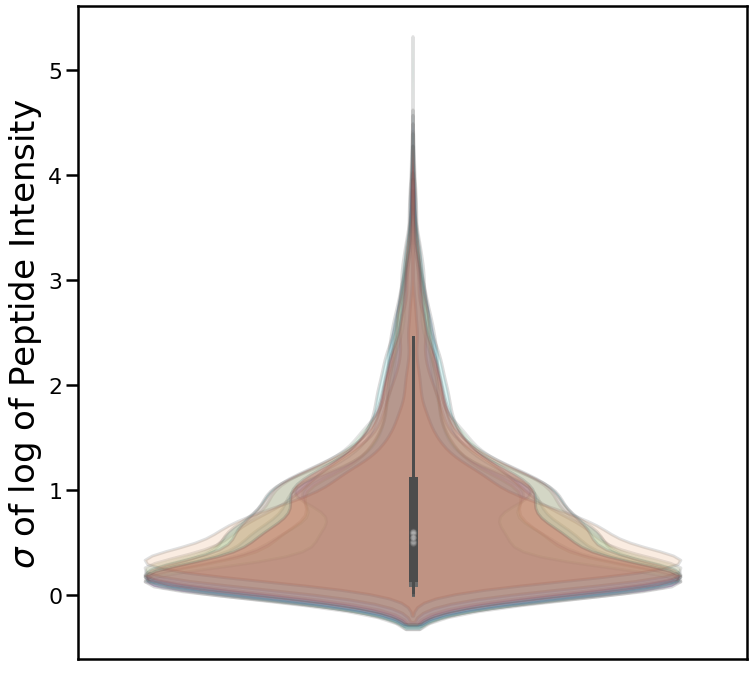

In [66]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

bin_vals = df_stats_filtered["quantile_bin_mu_median_of_bin_range"].values.unique()
for i in range(len(bin_vals)):
    df_stats_slice = df_stats_filtered[df_stats_filtered["quantile_bin_mu_median_of_bin_range"] == bin_vals[i]].copy()
    df_stats_slice["quantile_bin_mu_median_of_bin_range"] = 0
    sns.violinplot(data = df_stats_slice, x  = "quantile_bin_mu_median_of_bin_range", y = "std",
                   ax = ax, color = color[i])
    plt.setp(ax.collections, alpha = 0.2)
ax.get_xaxis().set_visible(False)
ax.set_ylabel(r"$\sigma$ of log of Peptide Intensity ", fontsize = 34)